In [20]:
import pandas as pd
from pathlib import Path
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
#reading the data 
file_path = '/home/panther/Downloads/mushrooms.csv'
Raw_data = pd.read_csv(file_path)

# Data preprocessing

class


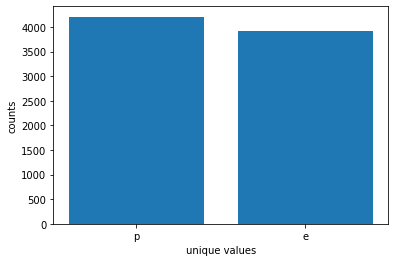

cap-shape


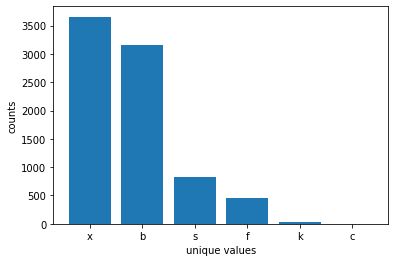

cap-surface


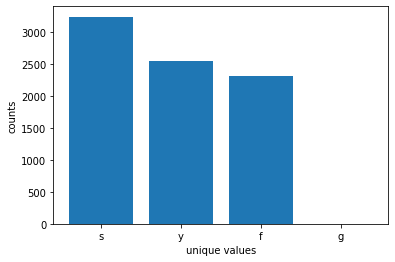

cap-color


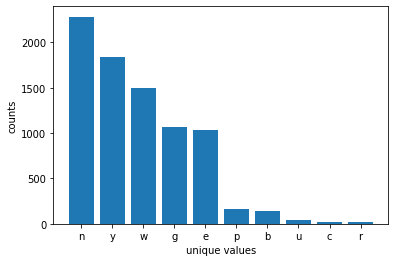

bruises


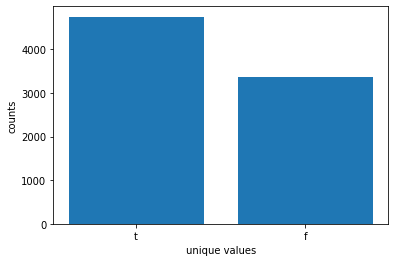

odor


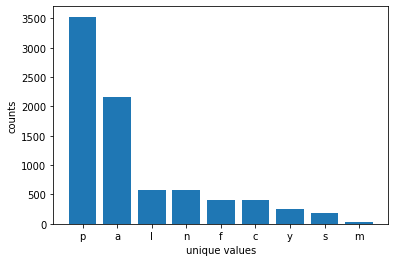

gill-size


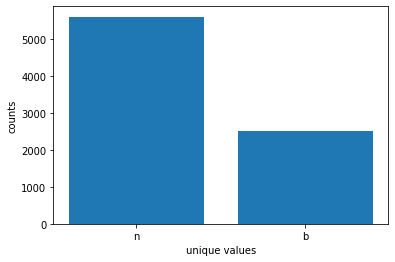

gill-color


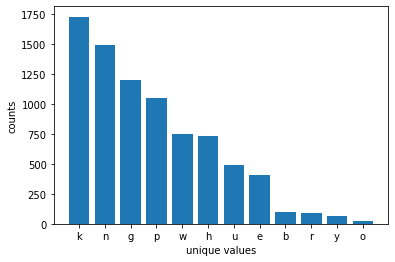

stalk-shape


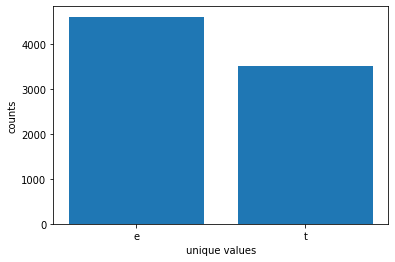

stalk-root


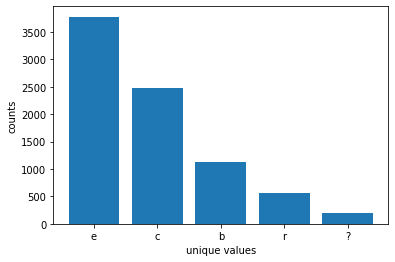

ring-type


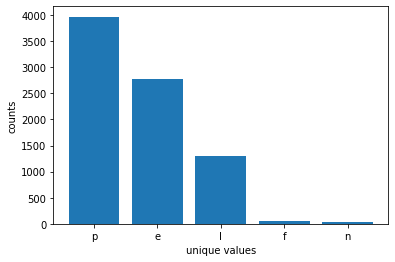

spore-print-color


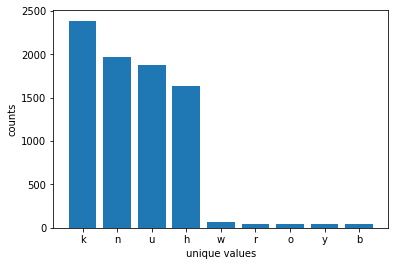

population


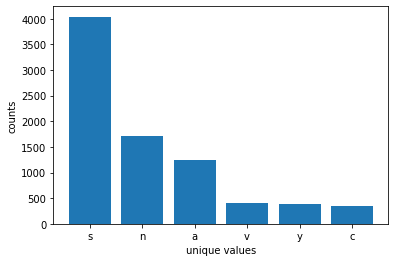

habitat


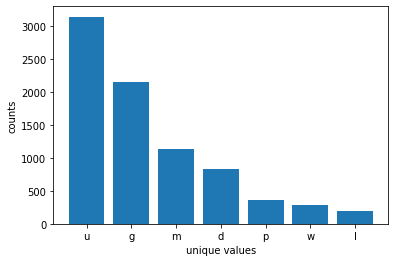

stalk_surface


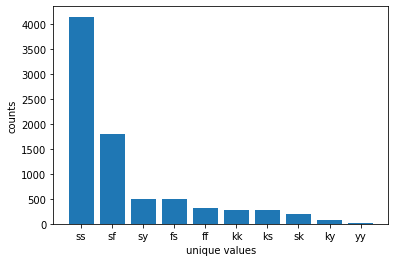

stalk-color


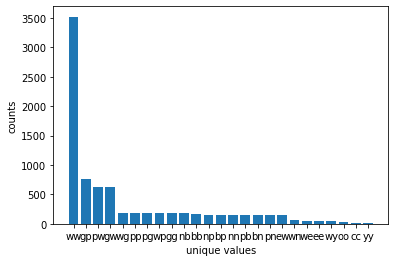

KeyError: 'stalk-surface-above-ring'

In [23]:
#understanding columns
for i in Raw_data.columns:
    print(i)
    plt.bar(Raw_data[i].unique(),Raw_data[i].value_counts())
    plt.xlabel('unique values')
    plt.ylabel('counts')
    plt.show()
#checking columns having more than 80% single values
fx = lambda x : max(Raw_data[x].value_counts())/Raw_data.shape[0]>.80
single_value_columns = list(filter(fx,Raw_data.columns))

#checking for duplicate values
Raw_data[Raw_data.duplicated()]

#checking null values
Raw_data.isnull().sum()

Raw_data = Raw_data.drop(single_value_columns,axis=1)

#merging stalk surface below ring and above ring because they behave like same 
Raw_data['stalk_surface'] = Raw_data['stalk-surface-above-ring']+Raw_data['stalk-surface-below-ring']
#merging stalk colour above and below ring
Raw_data['stalk-color'] = Raw_data['stalk-color-above-ring']+Raw_data['stalk-color-below-ring']
#deleting merged coloumns
Raw_data= Raw_data.drop(['stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring'],axis=1)

In [24]:
#taking label out from the data set
X = Raw_data.drop(["class"], axis=1)
y = Raw_data["class"]
X = pd.get_dummies(X)

#encoading label with label encoader 
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Feature selection using random forest

In [25]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.9969230769230769
precision_score = 0.9969412191582003
 
DecisionTreeClassifier - 
recall_score = 1.0
precision_score = 0.9969412191582003
 
RandomForestClassifier - 
Precision= 1.0
recall= 1.0


# Feature selection using Decision tree

In [26]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(DecisionTreeClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.9969230769230769
precision_score = 0.9969412191582003
 
DecisionTreeClassifier - 
recall_score = 0.9981538461538462
precision_score = 0.9969412191582003
 
RandomForestClassifier - 
Precision= 0.9981603927986907
recall= 0.9981538461538462


# Feature selection using logistic regression

In [28]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(LogisticRegression())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 1.0
precision_score = 1.0
 
DecisionTreeClassifier - 
recall_score = 1.0
precision_score = 1.0
 
RandomForestClassifier - 
Precision= 1.0
recall= 1.0


For this data all models works well with feature selection based on Logistic regression metod